In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd 

# データCSV（自作）
corona_df = pd.read_csv('data.csv', index_col=0)
countries = corona_df.columns
corona_df.head(20)

,Italy,Spain,France,UK,US,Iran,Germany,South Korea,Switzerland,Netherlands
days since the first confirmed death,,,,,,,,,,
0,1.0,1.0,1,1.0,1.0,2.0,2.0,1.0,1.0,1.0
1,2.0,2.0,1,2.0,1.0,2.0,2.0,2.0,1.0,1.0
2,3.0,3.0,1,2.0,6.0,4.0,3.0,2.0,1.0,3.0
3,7.0,8.0,1,3.0,9.0,6.0,6.0,6.0,2.0,4.0
4,11.0,10.0,1,5.0,11.0,8.0,8.0,8.0,2.0,4.0
5,12.0,17.0,1,6.0,12.0,12.0,9.0,11.0,3.0,5.0
6,17.0,30.0,1,8.0,15.0,16.0,13.0,12.0,4.0,5.0
7,21.0,36.0,1,10.0,19.0,19.0,17.0,13.0,7.0,10.0
8,29.0,55.0,1,11.0,22.0,26.0,26.0,16.0,11.0,12.0


## フィッティングする


Italy: doubling 2.6 days / R^2: 0.99
Spain: doubling 2.1 days / R^2: 0.99
France : doubling 2.8 days / R^2: 0.98
UK: doubling 1.9 days / R^2: 0.98
US: doubling 3.5 days / R^2: 0.98
Iran: doubling 3.7 days / R^2: 0.99
Germany: doubling 2.2 days / R^2: 0.98
South Korea: doubling 8.2 days / R^2: 0.92
Switzerland: doubling 2.5 days / R^2: 0.98
Netherlands: doubling 1.9 days / R^2: 0.99


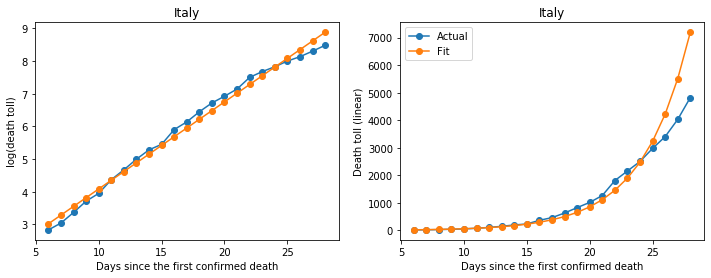

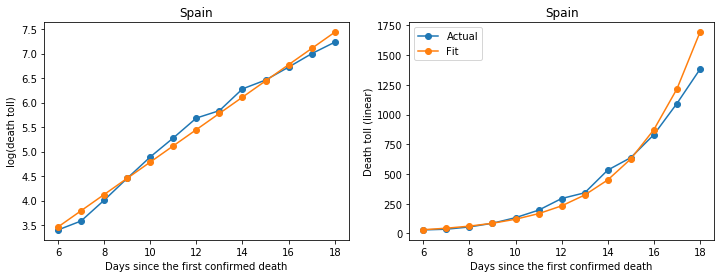

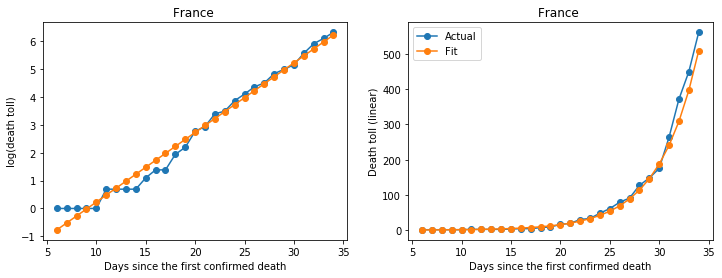

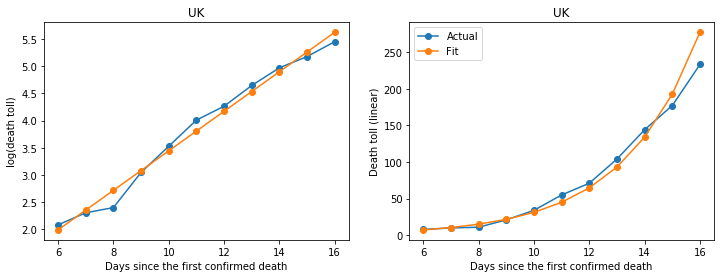

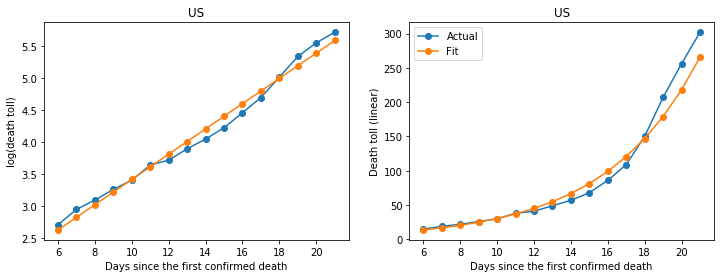

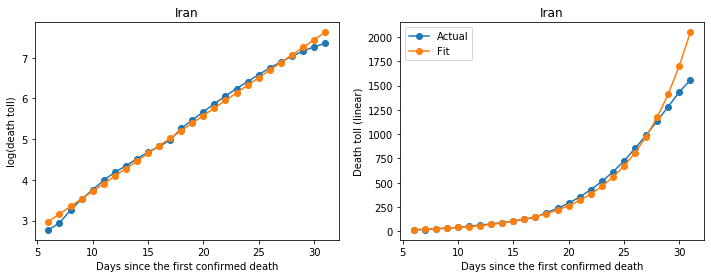

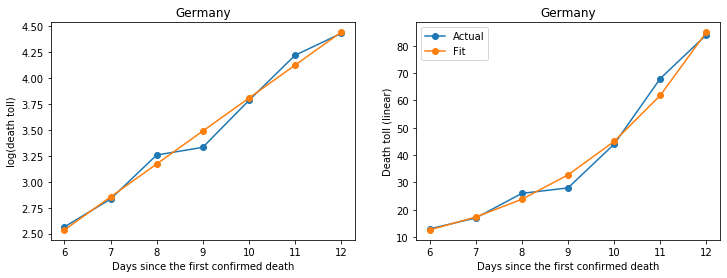

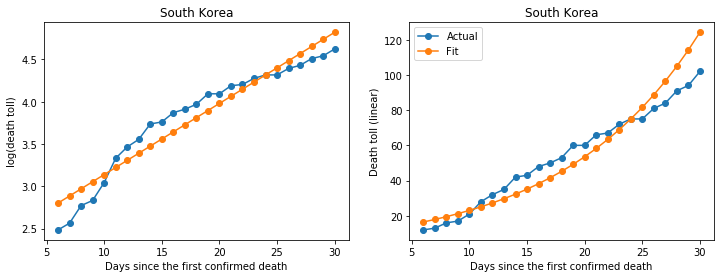

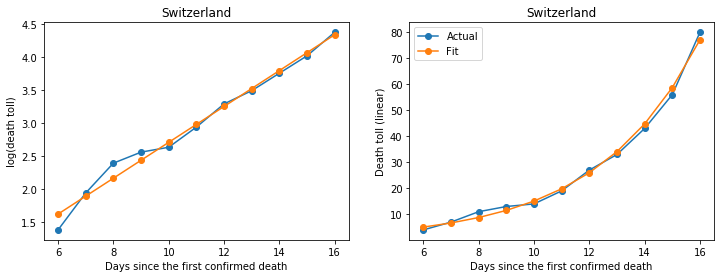

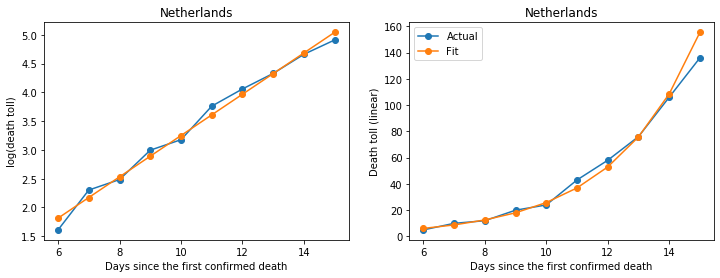

In [16]:
for country in countries:
    y = corona_df[country].dropna().values[6:]
    ylog = np.log(y)
    days = len(y)
    x = np.arange(0,days,1,'int')
    #plt.plot(x,y)
    #plt.plot(x,ylog)

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,ylog)
    doubling = np.log(2)/slope
    print(f'{country}: doubling {doubling:.2} days / R^2: {r_value**2:.2}')

    fit_y = [np.exp(slope*d+intercept) for d in range(0,days)]
    #corona_df[f'{country}_fit'] = fit_y + [np.nan]*(len(corona_df)-len(corona_df[country].dropna()))

    fig,axes=plt.subplots(1,2, figsize=(12,4))
    axes[0].plot(x+6,np.log(y),'o-')
    axes[0].plot(x+6,np.log(fit_y),'o-')
    axes[0].set_title(country)
    axes[0].set_xlabel('Days since the first confirmed death')
    axes[0].set_ylabel('log(death toll)')
    axes[1].plot(x+6,y,'o-')
    axes[1].plot(x+6,fit_y,'o-')
    axes[1].set_title(country)
    axes[1].set_xlabel('Days since the first confirmed death')
    axes[1].set_ylabel('Death toll (linear)')
    plt.legend(['Actual', 'Fit'])
    plt.savefig(f'{country}_fitting.png', dpi=400, bbox_inches='tight')

## 推定する

Italy: doubling 2.6 days / R^2: 0.99
Spain: doubling 2.1 days / R^2: 0.99
France : doubling 2.8 days / R^2: 0.98
UK: doubling 1.9 days / R^2: 0.98
US: doubling 3.5 days / R^2: 0.98
Iran: doubling 3.7 days / R^2: 0.99
Germany: doubling 2.2 days / R^2: 0.98
South Korea: doubling 8.2 days / R^2: 0.92
Switzerland: doubling 2.5 days / R^2: 0.98
Netherlands: doubling 1.9 days / R^2: 0.99


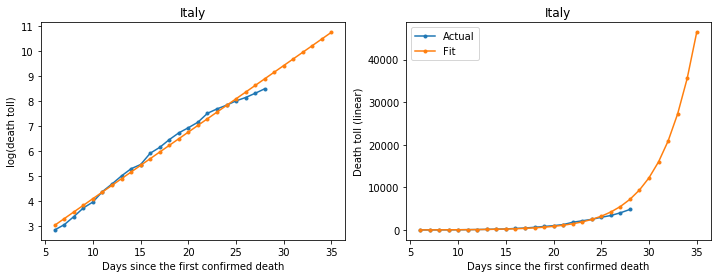

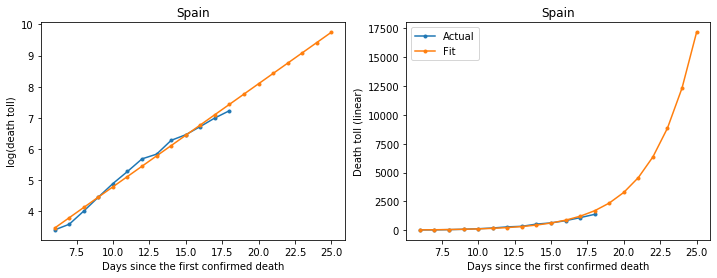

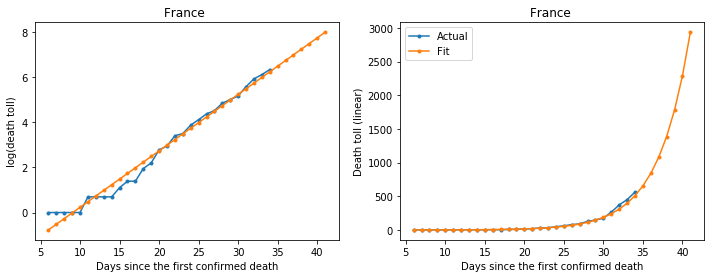

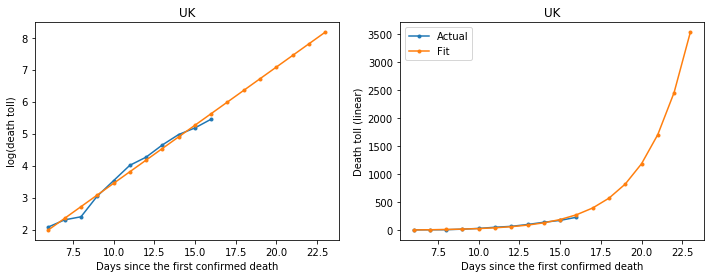

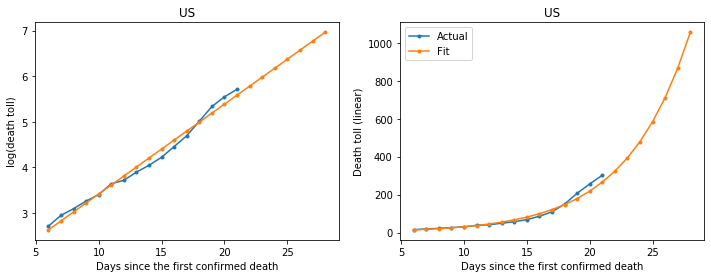

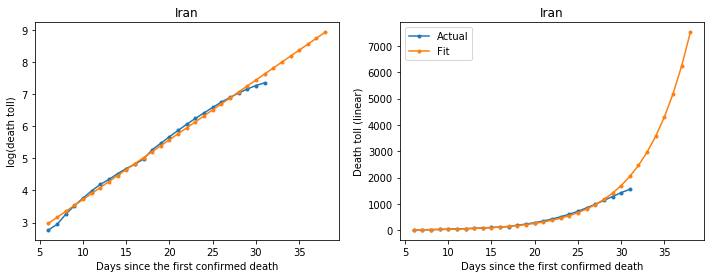

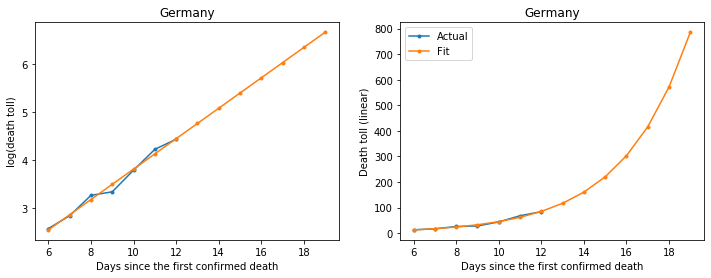

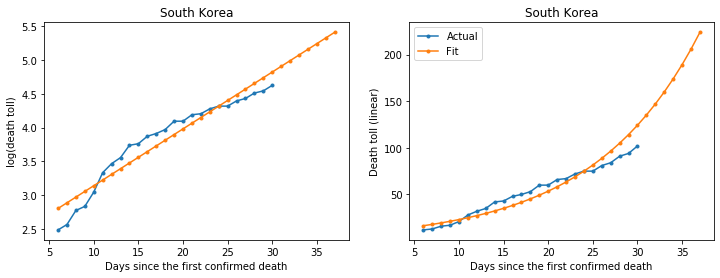

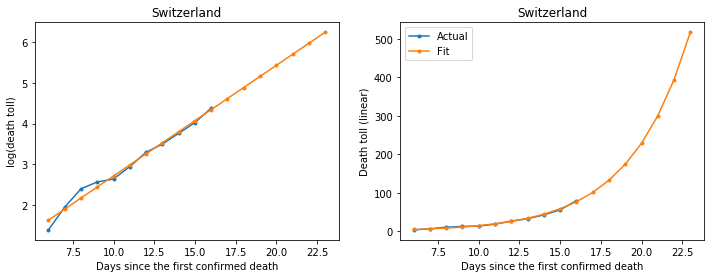

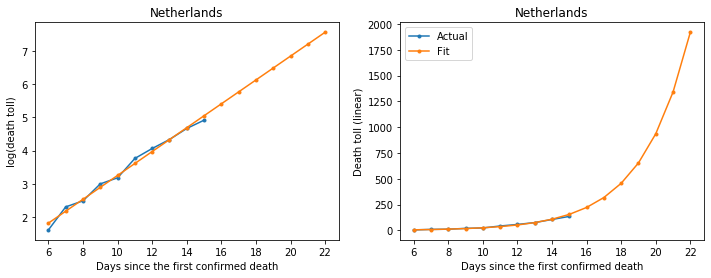

In [17]:
# 何日先まで予測するか
period = 7

# prediction 
for country in countries:
    y = corona_df[country].dropna().values[6:]
    ylog = np.log(y)
    days = len(y)
    x = np.arange(0,days,1,'int')
    #plt.plot(x,y)
    #plt.plot(x,ylog)

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,ylog)
    doubling = np.log(2)/slope
    print(f'{country}: doubling {doubling:.2} days / R^2: {r_value**2:.2}')

    fit_y = [np.exp(slope*d+intercept) for d in range(0,days+period)]
    fit_x = np.arange(len(fit_y))
    #corona_df[f'{country}_fit'] = fit_y + [np.nan]*(len(corona_df)-len(corona_df[country].dropna()))

    fig,axes=plt.subplots(1,2, figsize=(12,4))
    axes[0].plot(x+6,np.log(y),'.-')
    axes[0].plot(fit_x+6,np.log(fit_y),'.-')
    axes[0].set_title(country)
    axes[0].set_xlabel('Days since the first confirmed death')
    axes[0].set_ylabel('log(death toll)')
    axes[1].plot(x+6,y,'.-')
    axes[1].plot(fit_x+6,fit_y,'.-')
    axes[1].set_title(country)
    axes[1].set_xlabel('Days since the first confirmed death')
    axes[1].set_ylabel('Death toll (linear)')
    plt.legend(['Actual', 'Fit'])
    plt.savefig(f'{country}_fitting_withprediction.png', dpi=400, bbox_inches='tight')

## 日本は？

Japan: doubling 6.0 days / R^2: 0.95


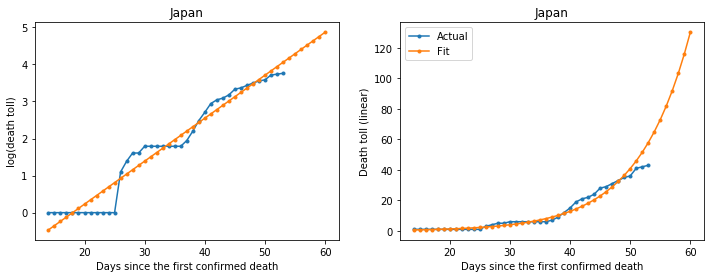

In [20]:
country = 'Japan'
period = 7

# Data obtained from 
# https://gis.jag-japan.com/covid19jp/?fbclid=IwAR30DDBBnQRcXnIOoqJmjbs-Z4kYIS0LvHMBqwBbORWRV3TpjYstvrrBrE4
japan_df = pd.read_csv('COVID-19.csv')
tmp = japan_df[['確定日','死者合計']].dropna()
y = japan_df['死者合計'].dropna().values[14:]# count from Feb 13
ylog = np.log(y)
days = len(y)
x = np.arange(0,days,1,'int')
#plt.plot(x,y)
#plt.plot(x,ylog,'o-')
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,ylog)
doubling = np.log(2)/slope
print(f'{country}: doubling {doubling:.2} days / R^2: {r_value**2:.2}')

fit_y = [np.exp(slope*d+intercept) for d in range(0,days+period)]
fit_x = np.arange(len(fit_y))
#corona_df[f'{country}_fit'] = fit_y + [np.nan]*(len(corona_df)-len(corona_df[country].dropna()))

fig,axes=plt.subplots(1,2, figsize=(12,4))
axes[0].plot(x+14,np.log(y),'.-')
axes[0].plot(fit_x+14,np.log(fit_y),'.-')
axes[0].set_title(country)
axes[0].set_xlabel('Days since the first confirmed death')
axes[0].set_ylabel('log(death toll)')
axes[1].plot(x+14,y,'.-')
axes[1].plot(fit_x+14,fit_y,'.-')
axes[1].set_title(country)
axes[1].set_xlabel('Days since the first confirmed death')
axes[1].set_ylabel('Death toll (linear)')
plt.legend(['Actual', 'Fit'])
plt.savefig('Japan_fitting_withprediction.png', dpi=400, bbox_inches='tight')


## Sigmoid関数（ロジスティック関数）

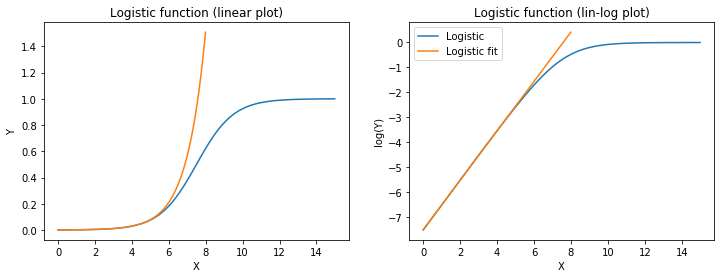

In [19]:
import numpy as np 
import matplotlib.pyplot as plt
k = 1; L = 1; x0 = 7.5
x = np.arange(0,15,0.01)
y = [L / (1 + np.exp(-k*(x-x0))) for x in x]

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x[0:500],np.log(y[0:500]))
fit_y = [np.exp(slope*d+intercept) for d in x[0:800]]
fit_x = x[0:800] 

fig,axes=plt.subplots(1,2,figsize=(12,4))
axes[0].plot(x, y)
axes[0].plot(fit_x, fit_y)
axes[0].set_title('Logistic function (linear plot)')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
plt.legend(['Logistic', 'Logistic fit'])
axes[1].plot(x, np.log(y))
axes[1].plot(fit_x, np.log(fit_y))
axes[1].set_title('Logistic function (lin-log plot)')
axes[1].set_xlabel('X')
axes[1].set_ylabel('log(Y)')
plt.legend(['Logistic', 'Logistic fit'])
plt.savefig('logistic.png', dpi=400, bbox_inches='tight')